
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
file_name = 'drive/MyDrive/Colab Notebooks/data/medical-charges.csv'

medical_df = pd.read_csv(file_name)
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Завдання 1. Ідеї для аналітичного підходу до прогнозування `charges`**

1. Проаналізувати залежність `charges` від `age`, `bmi`, `children`, використовуючи кореляційну матрицю.
2. Порівняти середні `charges` у групах за `smoker`, `sex`, `region`.
3. Побудувати гістограми `charges` для різних значень `bmi` та `age`.
4. Перевірити розподіл значень у колонці `charges`, щоб виявити аномалії або незвичайні дані.


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [ ]:
medical_df['sex'].value_counts()

,count
sex,
male,676
female,662


In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['pink', 'blue'],
                   title='Annual Medical Charges by Sex')
fig.update_layout(bargap=0.05)
fig.show()

**Завдання 2. Спостереження для розподілу `charges` за категорією `sex`**:
1. Чоловіки мають вищі медичні витрати та більше аномальних випадків у порівнянні з жінками. Основна маса витрат для обох статей зосереджена до 20k.
2. У жінок витрати більш рівномірні та сконцентровані, тоді як у чоловіків спостерігається ширший розкид.
3. Чоловіки демонструють більшу варіативність витрат, що може бути пов'язано з іншими факторами, такими як здоров'я чи спосіб життя.

In [ ]:
medical_df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   title='Annual Medical Charges by Region')
fig.update_layout(bargap=0.05)
fig.show()

**Завдання 2. Спостереження для розподілу `charges` за категорією `region`**:
1. Усі регіони мають схожий розподіл витрат із більшістю значень до 20k, але в `southeast` спостерігається більше високих значень.
2. Медичні витрати у всіх регіонах мають схожу структуру, проте `northeast` має найвищу медіану, а `southeast` — найбільший розкид.
3. Регіони мають подібний загальний розподіл, але `southeast` виділяється варіативністю, а `northeast` — найвищою медіаною.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [ ]:
fig = px.histogram(medical_df,
                   x='region',
                   color='smoker',
                   title='Smoker Distribution by Region')
fig.update_layout(bargap=0.05)
fig.show()

**Завдання 3. Спостереження для розподілу курців (`smoker`) за регіонами (`region`)**:
1. У всіх регіонах некурців більше, ніж курців.
2. Співвідношення курців і некурців однакове у всіх регіонах.
3. Регіон суттєво не впливає на куріння.

In [ ]:
fig = px.histogram(medical_df,
                   x='children',
                   color='smoker',
                   barmode='group',
                   title='Smoker Distribution by Number of Children')
fig.update_layout(bargap=0.05)
fig.show()

**Завдання 3. Спостереження для розподілу курців (`smoker`) за кількістю дітей (`children`):**
1. Найбільше курців і некурців серед людей без дітей.
2. Із збільшенням кількості дітей кількість курців і некурців зменшується.
3. Некурців значно більше у всіх групах.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [ ]:
fig = px.violin(medical_df,
                x='charges',
                color='children',
                title='Relationship Between Charges and Number of Children',
                category_orders={"children": sorted(medical_df['children'].unique())})
fig.show()

In [ ]:
medical_df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


**Завдання 4. Спостереження для зв’язку між `charges` та `children`:**
1. Кількість дітей не має очевидного впливу на рівень медичних витрат.
2. Для людей з 4–5 дітьми витрати виглядають стабільнішими, що може бути пов’язано з невеликою кількістю спостережень у цих групах.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

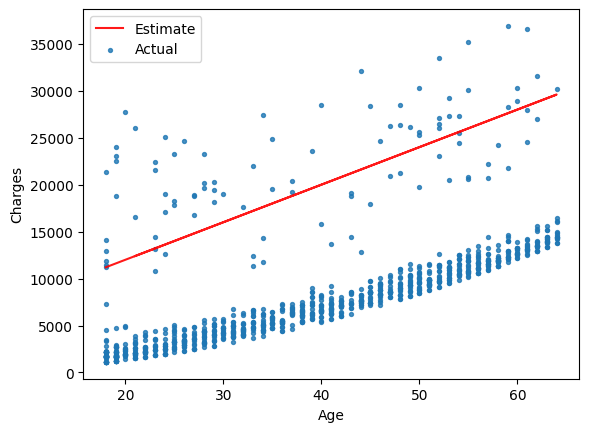

In [ ]:
w1 = 400
b1 = 4000
try_parameters(non_smoker_df, w1, b1)

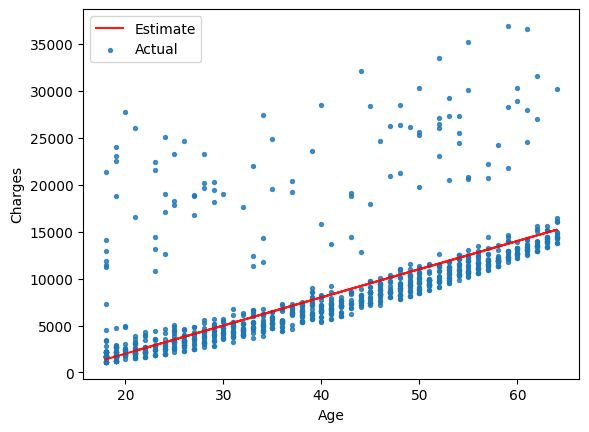

In [ ]:
w2 = 300
b2 = -4000
try_parameters(non_smoker_df, w2, b2)

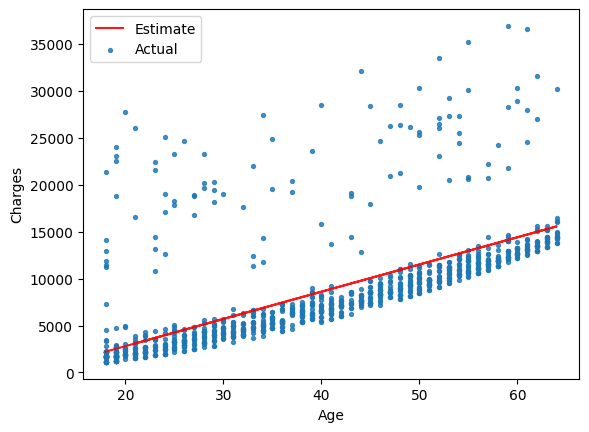

In [ ]:
w3 = 290
b3 = -3000
try_parameters(non_smoker_df, w3, b3)

**Завдання 5. Спостереження для параметрів `w` та `b`:**
Третій варіант параметрів найкраще описує залежність між віком і витратами для некурців, покращуючись із кожною спробою через візуальну оцінку та коректування обох параметрів.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [ ]:
import numpy as np

In [ ]:
def calculate_rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))


In [ ]:
targets = non_smoker_df['charges']

In [ ]:
predicted = estimate_charges(non_smoker_df['age'], w1, b1)
calculate_rmse(targets, predicted)

12384.281326805974

In [ ]:
predicted = estimate_charges(non_smoker_df['age'], w2, b2)
calculate_rmse(targets, predicted)

4725.9133994520325

In [ ]:
predicted = estimate_charges(non_smoker_df['age'], w3, b3)
calculate_rmse(targets, predicted)

4673.508821970761

**Завдання:**
1. Найнижче значення RMSE, яке вдалося досягти, становить 4673.51 при параметрах `w3` = 290 і `b3` = -3000.
2. Стратегія для покращення значень `w` та `b`:
- Почати з найкращих знайдених параметрів (w3 = 290, b3 = -3000).
- Вносити менші зміни в параметри, наприклад, на ±5 чи ±1.
- Спочатку коригувати лише один параметр, фіксуючи інший, а потім навпаки.
- Використати графік або теплову карту для пошуку мінімального RMSE.